In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])


# Image classifier using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 1s 0us/step


In [4]:
# shape of you

X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
# divide to vaidation 

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# Sequential Model
# sequential api
model = keras.models.Sequential()

# layers.flatten -> X.reshape(-1,1) -> converts to 1 D, input shape = Shape of instance
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
# Alternate form

model_alt = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the model -> Loss function, metrics, accuracy

model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7214 - accuracy: 0.7619 - val_loss: 0.5030 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4921 - accuracy: 0.8288 - val_loss: 0.4636 - val_accuracy: 0.8384
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4446 - accuracy: 0.8434 - val_loss: 0.4167 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4173 - accuracy: 0.8546 - val_loss: 0.3969 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3978 - accuracy: 0.8599 - val_loss: 0.3859 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3814 - accuracy: 0.8661 - val_loss: 0.3704 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3686 - accuracy: 0.8699 - val_loss: 0.3562 - val_accuracy

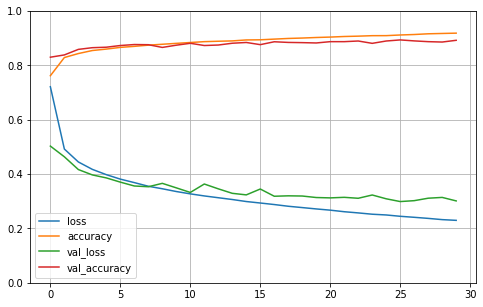

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(4)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)